# importing librarys

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import StratifiedKFold

# importing data

In [2]:
hiphop_track = pd.read_csv('../input/classify-song-genres-from-audio-data/fma-rock-vs-hiphop.csv')

echonest_m = pd.read_json('../input/classify-song-genres-from-audio-data/echonest-metrics.json',precise_float=True)

In [3]:
hiphop_track.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [4]:
echonest_m.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


# merging relevant column of hiphop track and echonest as both have same track id

In [5]:
merger_track = echonest_m.merge(hiphop_track[['track_id','genre_top']],on='track_id')

# inspecting resultant dataframe

In [6]:
merger_track.isnull().sum()

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
genre_top           0
dtype: int64

# There is no null value in our data

In [7]:
merger_track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


In [8]:
merger_track.head(100)

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock
...,...,...,...,...,...,...,...,...,...,...
95,524,0.993265,0.384601,0.544499,0.923347,0.097180,0.037387,166.460,0.823426,Rock
96,525,0.980884,0.313439,0.370345,0.920694,0.088021,0.046286,135.019,0.187453,Rock
97,526,0.874686,0.491505,0.301819,0.836016,0.110169,0.030764,156.583,0.678679,Rock
98,527,0.994910,0.318432,0.783259,0.869710,0.090503,0.057887,152.004,0.930636,Rock


In [9]:
merger_track.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,30164.871720,4.870600e-01,0.436556,0.625126,0.604096,0.187997,0.104877,126.687944,0.453413
std,28592.013796,3.681396e-01,0.183502,0.244051,0.376487,0.150562,0.145934,34.002473,0.266632
min,2.000000,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,7494.250000,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,20723.500000,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,44240.750000,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,124722.000000,9.957965e-01,0.961871,0.999768,0.993134,0.971392,0.966177,250.059000,0.983649


# now creating correlation metrics

In [10]:
corr_metrics = merger_track.corr()
corr_metrics.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


# standardization

In [11]:
feature = merger_track.drop(['genre_top','track_id'],axis=1)

labels = merger_track['genre_top']

#scaling feature

scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature)

# PCA on scaled data

Text(0.5, 0, 'PCA')

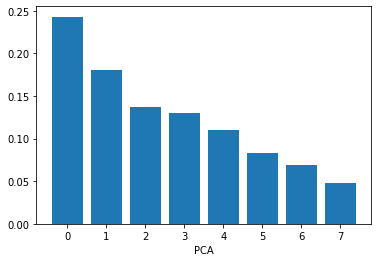

In [12]:
pca = PCA()
pca.fit(scaled_features)

our_exp_variance = pca.explained_variance_ratio_ 


fig, ax = plt.subplots()
ax.bar(range(pca.n_components_),our_exp_variance)
ax.set_xlabel('PCA')

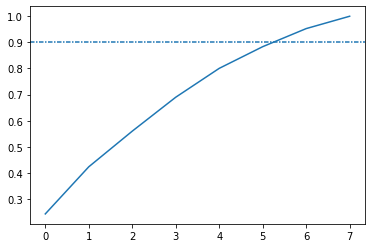

In [13]:
cum_variance = np.cumsum(our_exp_variance)

fig, ax = plt.subplots()
ax.plot(cum_variance)
ax.axhline(y=0.9, linestyle=(0, (3, 1, 1, 1)))

n_components = ((np.where(cum_variance > 0.9))[0][0])

pca = PCA(n_components, random_state=10)
pca.fit(scaled_features)
pca_projection = pca.transform(scaled_features)

# now train decision tree to classify genre

In [14]:
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels,random_state=10)

d_tree = DecisionTreeClassifier(random_state=10)
d_tree.fit(train_features,train_labels)

predict_labels_tree = d_tree.predict(test_features)

# comparing which model is best for our data decision tree to a logistic regression

In [15]:
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features,train_labels)
predict_labels_logit = logreg.predict(test_features)

class_report_tree = classification_report(test_labels,predict_labels_tree)
class_report_log = classification_report(test_labels,predict_labels_logit)

print("Decision Tree: \n", class_report_tree)
print("Logistic Regression: \n", class_report_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.60      0.60      0.60       235
        Rock       0.90      0.90      0.90       966

    accuracy                           0.84      1201
   macro avg       0.75      0.75      0.75      1201
weighted avg       0.84      0.84      0.84      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



# balance our model for better performance

In [16]:
hip_hop = merger_track.loc[merger_track['genre_top'] == 'Hip-Hop']
rock = merger_track.loc[merger_track['genre_top'] == 'Rock']
print(hip_hop.head())

rock = rock.sample(n=len(hip_hop),random_state=10)

rock_hiphop_balance = pd.concat([hip_hop,rock])

feature = rock_hiphop_balance.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hiphop_balance['genre_top']
pca_projection = pca.fit_transform(scaler.fit_transform(feature))

train_features, test_features, train_labels, test_labels = train_test_split(pca_projection,labels,random_state=10)

     track_id  acousticness  danceability    energy  instrumentalness  \
0           2      0.416675      0.675894  0.634476          0.010628   
1           3      0.374408      0.528643  0.817461          0.001851   
2           5      0.043567      0.745566  0.701470          0.000697   
3         134      0.452217      0.513238  0.560410          0.019443   
118       583      0.748986      0.765886  0.513173          0.957209   

     liveness  speechiness    tempo   valence genre_top  
0    0.177647     0.159310  165.922  0.576661   Hip-Hop  
1    0.105880     0.461818  126.957  0.269240   Hip-Hop  
2    0.373143     0.124595  100.260  0.621661   Hip-Hop  
3    0.096567     0.525519  114.290  0.894072   Hip-Hop  
118  0.614844     0.886914  180.025  0.401672   Hip-Hop  


# now fitting our data to logistic regression and decision tree for best prediction

In [17]:
d_tree = DecisionTreeClassifier(random_state=10)
d_tree.fit(train_features,train_labels)
predict_labels_tree = d_tree.predict(test_features)

logregresion = LogisticRegression(random_state=10)
logregresion.fit(train_features,train_labels)
predict_labels_logistic = logregresion.predict(test_features)

# comparing models

In [18]:
print("Decision Tree: \n", classification_report(test_labels,predict_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels,predict_labels_logistic))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.76      0.80      0.78       225
        Rock       0.79      0.75      0.77       230

    accuracy                           0.77       455
   macro avg       0.77      0.77      0.77       455
weighted avg       0.77      0.77      0.77       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.83      0.80      0.82       225
        Rock       0.81      0.84      0.83       230

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.82      0.82      0.82       455



# since our data is split into train and test sets can impact model performance we have to use CV methond called K-fold

In [19]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)

d_tree = DecisionTreeClassifier(random_state=10)
logregresion = LogisticRegression(random_state=10)

tree_score = cross_val_score(d_tree,pca_projection,labels,cv=kf)
logistic_score = cross_val_score(logregresion,pca_projection,labels,cv=kf)

In [20]:
print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logistic_score))

Decision Tree: 0.787912087912088 Logistic Regression: 0.8208791208791208


# Finally, we get aggregate results from each fold for a final model performance score